# Picking an Ambulance

Base on two criteria

- Closest ambulance - Based on shortest travel time
- Disruption - When I remove one ambulance, what is the resulting coverage and the difference? 

In [1]:
import read_data
import numpy as np
from matplotlib import pyplot as plt

# Data
(calls, allbases, demands, times, calls_latlong) = read_data.populate_data()
allbases = np.delete(np.array(allbases), 2, 1)
demands = np.delete(np.array(demands), 2, 1)
times = np.array(times)
calls_latlong = np.array(calls_latlong)

num_ambulances = 8

ind = np.random.randint(0, allbases.shape[0], num_ambulances)
bases = allbases[ind,:]
points = np.delete(allbases, ind, 0)

chosen_base_costs = times[ind,:]


Need the travel time between the ambulance starting location and the case end location. 

- If ambulance is at base, and location can be using demand location, then do (base, location) --> (base, time)
- Else, query Google

In [2]:
# Randomly choose a demand point
call_location = np.random.randint(0, high=100)
call_location

93

In [3]:
# Fastest it can get there
current_travel_times = chosen_base_costs[:, call_location]
fastest = np.min(current_travel_times)
ambulance = -1

# Which ambulance to choose from chosen_base_costs? 
for amb in range(len(current_travel_times)):
    if fastest == current_travel_times[amb]:
        ambulance = amb
        break
ambulance, fastest, current_travel_times

(3,
 346.0,
 array([ 1144.,   786.,   581.,   346.,  1076.,  1053.,   661.,   909.]))

In [4]:
def ind_to_set_of_ind_one_removed(chosen_base_costs):
    """ Returns the set of all sets of bases with one ambulance removed. """
    
    all_one_removed = []
    for i in range(len(chosen_base_costs)):
        all_one_removed.append(np.delete(chosen_base_costs, i, axis=0))
    return all_one_removed

In [5]:
all_one_removed = ind_to_set_of_ind_one_removed(chosen_base_costs)

In [10]:
def radius_to_coverage (chosen_costs, r1=600, graph=True):
    r1_coverage = np.any(chosen_costs < r1, 0)
    r1_covered = np.nonzero(r1_coverage)
    r1_exposed = np.nonzero(np.logical_not(r1_coverage))

    c = np.shape(r1_covered)[1]
    e = np.shape(r1_exposed)[1]
    ratio = (c / (c + e))
    

    if graph:
        plt.figure()
        plt.scatter(demands[r1_covered,0],demands[r1_covered,1], c='b')
        plt.scatter(demands[r1_exposed,0],demands[r1_exposed,1], c='r')
        plt.scatter(bases[:,0],bases[:,1], c='y')
        plt.show()
    
    return 100 * ratio

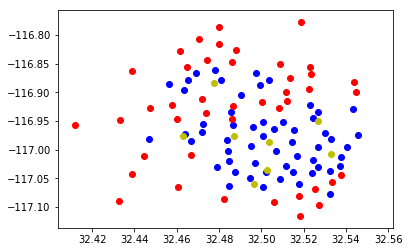

56.99999999999999

In [11]:
c = radius_to_coverage(chosen_base_costs)
c

In [13]:
for amb in range(0, num_ambulances):
    coverage = radius_to_coverage(all_one_removed[amb], graph=False)
    print ("Amb %2d. "% amb, 
           "Travel:  %4d. " % current_travel_times [amb],
           "Cover:  %2d. " % coverage, 
           "Disruption:  %2.1f. " % (c - coverage)
          )
print ("Fastest Time: %d" % fastest )

Amb  0.  Travel:  1144.  Cover:  55.  Disruption:  2.0. 
Amb  1.  Travel:   786.  Cover:  56.  Disruption:  0.0. 
Amb  2.  Travel:   581.  Cover:  54.  Disruption:  3.0. 
Amb  3.  Travel:   346.  Cover:  56.  Disruption:  1.0. 
Amb  4.  Travel:  1076.  Cover:  46.  Disruption:  11.0. 
Amb  5.  Travel:  1053.  Cover:  54.  Disruption:  3.0. 
Amb  6.  Travel:   661.  Cover:  54.  Disruption:  3.0. 
Amb  7.  Travel:   909.  Cover:  54.  Disruption:  3.0. 
Fastest Time: 346
